In [1]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt
import warnings



In [2]:
# la bound
# lb bound
# ht bound


In [3]:
def gen_deadline(exec_time, period,gen):
    # [a,b]
    b = 1.2 * period
    if(exec_time < 10):
        a = exec_time
    elif(exec_time < 100 and exec_time >= 10):
        a = 2*exec_time
    elif(exec_time < 1000 and exec_time >= 100):
        a = 3*exec_time
    else:
        a = 4*exec_time

    if(gen):
        a = 0.95*period
    return a+random.random()*(b-a)


def gen_tasksets(utilizations, periods,gen):

    def trunc(x, p):
        return int(x * 10 ** p) / float(10 ** p)
    # [[print(ui) for ui, pi in zip(us, ps)]
    #         for us, ps in zip(utilizations, periods)]
    return np.array([[[trunc(ui * pi, 6), trunc(pi, 6), trunc(gen_deadline(trunc(ui * pi, 6), trunc(pi, 6),gen), 6)] for ui, pi in zip(us, ps)]
            for us, ps in zip(utilizations, periods)])


In [4]:
def custom_period(n, nsets,max_,min_=1):
	max_power = np.log(max_)
	min_power = np.log(min_)

	intervals = np.arange(min_power,np.floor(max_power)+1)
	intervals = np.append(intervals, max_power)
	#print(intervals)
	task_pp = ((n-1)//(len(intervals)-1))
	
	task_lf = np.mod(n-1, len(intervals)-1).astype(int)
	#print(task_lf,task_pp)
	periods = np.zeros((nsets, n))
	for i in range(nsets):
		for j in range(len(intervals)-1):
			if(j<task_lf):
				periods[i][j*task_pp+j:(j+1)*task_pp+j+1] = np.random.uniform(low=np.exp(intervals[j]), high=np.exp(intervals[j+1]), size=task_pp+1)
			else:
				periods[i][j*task_pp+task_lf:(j+1)*task_pp+task_lf] = np.random.uniform(low=np.exp(intervals[j]), high=np.exp(intervals[j+1]), size=task_pp)
	periods[0:nsets,-1] =max_ 
	return periods


In [5]:
custom_period(14,2,100)

array([[  1.39215518,   1.14677824,   1.20122554,   6.86091478,
          2.8419806 ,   4.93012825,  17.61939568,  10.10338341,
         16.34904084,  44.64240146,  30.0699513 ,  63.23753835,
         78.99311092, 100.        ],
       [  2.15031887,   1.74733928,   2.28655645,   3.33781328,
          6.4249132 ,   4.60750228,   9.69396293,   8.06916009,
         19.72882272,  24.37598672,  21.69749355,  97.60159593,
         73.59740243, 100.        ]])

In [6]:
def UUniFastDiscard(n, u, nsets):
    sets = []
    while len(sets) < nsets:
        # Classic UUniFast algorithm:
        utilizations = []
        sumU = u
        for i in range(1, n):
            nextSumU = sumU * random.random() ** (1.0 / (n - i))
            utilizations.append(sumU - nextSumU)
            sumU = nextSumU
        utilizations.append(sumU)

        # If no task utilization exceeds 1:
        if all(ut <= 1 for ut in utilizations):
            sets.append(utilizations)

    return sets

    
def gen_uunifastdiscard(nsets, u, n):
    return UUniFastDiscard(n, u, nsets)

In [7]:
def get_taskset(nsets, n,t_max = 1000,util =0.9,gen=False):
	#n = 1000
	utilizations = gen_uunifastdiscard(nsets, util, n)
	periods = custom_period(n, nsets, t_max, 1)
	return gen_tasksets(utilizations, periods,gen)

	

In [8]:
taskset = get_taskset(1, 8)
taskset

array([[[3.66565000e-01, 2.30778100e+00, 1.62076800e+00],
        [4.66813000e-01, 5.94662700e+00, 5.01293700e+00],
        [1.57150000e-02, 7.73567100e+00, 8.24074100e+00],
        [8.51825000e-01, 3.62492670e+01, 4.31927500e+00],
        [7.10802200e+00, 1.45878334e+02, 1.54520209e+02],
        [1.57719870e+01, 2.68823970e+02, 2.65895929e+02],
        [3.62202279e+02, 9.47724841e+02, 1.09000492e+03],
        [1.47553291e+02, 1.00000000e+03, 8.02236360e+02]]])

In [9]:
taskset[0]

array([[3.66565000e-01, 2.30778100e+00, 1.62076800e+00],
       [4.66813000e-01, 5.94662700e+00, 5.01293700e+00],
       [1.57150000e-02, 7.73567100e+00, 8.24074100e+00],
       [8.51825000e-01, 3.62492670e+01, 4.31927500e+00],
       [7.10802200e+00, 1.45878334e+02, 1.54520209e+02],
       [1.57719870e+01, 2.68823970e+02, 2.65895929e+02],
       [3.62202279e+02, 9.47724841e+02, 1.09000492e+03],
       [1.47553291e+02, 1.00000000e+03, 8.02236360e+02]])

In [10]:
taskset_paper = np.array([[6000, 18000, 31000], [2000, 9000, 9800], [1000, 12000, 17000], [
                         90, 3000, 4200], [8, 78, 96], [2, 16, 12], [10, 120, 280], [26, 160, 660]])


In [11]:
def procDemand_func(taskset,t):
    deadlines = taskset[:,1]
    periods = taskset[:,2]
    wcet = taskset[:,0]

    h_t = np.sum(np.maximum(0, 1 + np.floor((t-deadlines)/(periods)))*wcet)

    return h_t

In [12]:
t = 16974
ht = procDemand_func(taskset_paper, t)
print(ht)

8890.0


In [13]:
print(taskset)

[[[3.66565000e-01 2.30778100e+00 1.62076800e+00]
  [4.66813000e-01 5.94662700e+00 5.01293700e+00]
  [1.57150000e-02 7.73567100e+00 8.24074100e+00]
  [8.51825000e-01 3.62492670e+01 4.31927500e+00]
  [7.10802200e+00 1.45878334e+02 1.54520209e+02]
  [1.57719870e+01 2.68823970e+02 2.65895929e+02]
  [3.62202279e+02 9.47724841e+02 1.09000492e+03]
  [1.47553291e+02 1.00000000e+03 8.02236360e+02]]]


In [14]:
taskset_paper = np.array([[6000, 18000, 31000], [2000, 9000, 9800], [1000, 12000, 17000], [90, 3000, 4200], [8, 78, 96], [2, 16, 12], [10, 120, 280], [26, 160, 660]])

In [15]:
def La_bound(taskset):
	"""
	Compute La calculations for the La bound
	
	"""
	wcet = taskset[:,0]
	deadlines = taskset[:,1]
	periods = taskset[:,2]
	utilizations = wcet/periods
	total_utilization = np.sum(utilizations)
	La = np.maximum(np.max(deadlines),np.sum((periods-deadlines)*utilizations)/(1-total_utilization))
	return La


In [16]:
taskset = get_taskset(1, 25)
la = La_bound(taskset)
print(la)

2.476473


In [17]:
La = La_bound(taskset_paper)
taskset_paper[:,0]/taskset_paper[:,1]
print(La)

18000.0


In [18]:
def Lb_bound(taskset):
    wcet = taskset[:,0]
    deadlines = taskset[:,1]
    periods = taskset[:,2]
    w0 = np.sum(wcet)
    a = w0
    b = np.sum(np.ceil(np.round((a/periods), 1)*wcet))
    while a != b and (((a**2 - b**2) > 0.0000001 or (b**2 - a**2) > 0.0000001)):
        #if (a**2 - b**2 > 0 and (np.sqrt(a**2 - b**2) > 0.0001)) or (a**2 - b**2 < 0 and (np.sqrt(b**2 - a**2) > 0.0001)):
        a = b
        b = np.round(np.sum(np.ceil(a/periods)*wcet), 1)
        
    Lb = b
    
    return Lb

In [19]:
Lb = Lb_bound(taskset_paper)
print(Lb)

16984.0


In [20]:
deadlines = taskset_paper[:, 1]
d_min = np.min(deadlines)
print(d_min)

16


In [21]:
def get_dmin(deadliness, L):
    return np.min(deadliness)
    
    

In [22]:
deadlines = taskset_paper[:, 1]
L = np.minimum(La, Lb)
d_min = get_dmin(deadlines, L)
print(d_min)


16


In [23]:
taskset_paper.shape

(8, 3)

In [24]:
def get_max_abs_deadline(taskset, L):
    n = taskset.shape[0]
    abs_deadlines = []
    
    for i in range(n):
        p = 0
        j = 0
        Ti = taskset[i][2]
        Di = taskset[i][1]
        while p < L:
            j += 1
            q = p
            p = j*Ti + Di
            
        abs_deadlines.append(q)
    return np.max(abs_deadlines)
    

In [25]:
L = 16984
t = get_max_abs_deadline(taskset_paper, L)

print(t)

16974


In [26]:
def get_max_di(taskset, t):
    n = taskset.shape[0]
    d_max = 0
    
    for j in range(n):
        if taskset[j][1] < t:
            d = np.floor((t - taskset[j][1])/taskset[j][2])*taskset[j][2] + taskset[j][1]
            if d == t:
                d = d - taskset[j][2]
            if d > d_max:
                d_max = d
                
    return d_max
    
    

In [27]:
def La_starbound(taskset):
	"""
	Compute La calculations for the La bound
	
	"""
	wcet = taskset[:, 0]
	deadlines = taskset[:, 1]
	periods = taskset[:, 2]
	utilizations = wcet/periods
	#print("deadlines", deadlines, "periods", periods, "utilizations", utilizations)
	#print(deadlines, periods, utilizations)
	total_utilization = np.sum(utilizations)
	#print("total utilization : " + str(total_utilization))
	# print(np.sum((periods-deadlines)*utilizations)/(1-total_utilization))
	#La = np.maximum(np.max(deadlines),np.max((periods-deadlines))*(total_utilization/(1-total_utilization)))
	print(np.max(deadlines))
	La = np.maximum(np.max(deadlines-periods),
	                np.sum((periods-deadlines)*utilizations)/(1-total_utilization))
	return La


In [28]:
def La_starcalculations(taskset):
	La_star = La_starbound(taskset)
	wcet = taskset[:, 0]
	deadlines = taskset[:, 1]
	periods = taskset[:, 2]
	tot_abs_deadlines = 0
	for job in taskset:
		job_abs_deadline = 0
		if (job[1] <= job[2]):
			job_abs_deadline = np.floor((La_star)/job[2])
			if (job_abs_deadline*job[2]+job[1] <= La):
				job_abs_deadline = job_abs_deadline+1
		else:
			job_abs_deadline = np.floor((La_star)/job[2])
		tot_abs_deadlines += job_abs_deadline
		print(job_abs_deadline, job[1], job[2])
	return tot_abs_deadlines


In [29]:
def La_boudcalculations(taskset):
	La = La_bound(taskset)
	#print("La : " + str(La))
	wcet = taskset[:, 0]
	deadlines = taskset[:, 1]
	periods = taskset[:, 2]
	tot_abs_deadlines = 0
	for job in taskset:
		job_abs_deadline = 0
		if (job[1] <= job[2]):
			job_abs_deadline = np.floor((La)/job[2])
			if (job_abs_deadline*job[2]+job[1] <= La):
				job_abs_deadline = job_abs_deadline+1
		else:
			job_abs_deadline = np.floor((La)/job[1])
		tot_abs_deadlines += job_abs_deadline
		#print(job_abs_deadline, job[1], job[2])
	return tot_abs_deadlines


In [30]:
def Lb_boudcalculations(taskset):
	Lb = Lb_bound(taskset)
	wcet = taskset[:, 0]
	deadlines = taskset[:, 1]
	periods = taskset[:, 2]
	tot_abs_deadlines = 0
	#print(Lb)
	for job in taskset:
		job_abs_deadline = 0
		if (job[1] <= job[2]):
			job_abs_deadline = np.floor((Lb)/job[2])
			if (job_abs_deadline*job[2]+job[1] <= La):
				job_abs_deadline = job_abs_deadline+1
		else:
			job_abs_deadline = np.floor((Lb)/job[2])
		tot_abs_deadlines += job_abs_deadline
		#print(job_abs_deadline, job[1], job[2])
	return tot_abs_deadlines


In [31]:
taskset_paper = np.array([[6000,18000,31000],[2000,9000,9800],[1000,12000,17000],[90,3000,4200],[8,78,96],[2,16,12],[10,120,280],[26,160,660]])

In [32]:
# taskset = get_taskset(1, 5)
# #taskset
# taskset = np.array(taskset[0])
# #qpa(taskset)


In [33]:
# x = [2, 9]
# # x.append(np.random.randint(1, 100))
# # print(x)

# qpa_y = []
# for i in x:
# 	print(i)
# 	taskset = get_taskset(1, int(i))
# 	qpa_y.append(qpa(taskset[0]))


In [34]:
def qpa(taskset):

    La = La_bound(taskset)
    #print("La : " + str(La))
    #Lb = Lb_bound(taskset)
    #print("Lb : " + str(Lb))
    L = La#np.minimum(La, Lb)
    #print("L : " + str(L))

    t = get_max_abs_deadline(taskset, L)
    #print("t : " + str(t))
    h_t = procDemand_func(taskset, t)
    #print("h(t) : " + str(h_t))
    d_min = get_dmin(taskset[:,1], L)


    total_cal = 0

    while (h_t := procDemand_func(taskset, t)) <= t and h_t > d_min:
        # h_t = procDemand_func(taskset, t)
        total_cal += 1

        #print("--t : " + str(t))
        #print("--h(t) : " + str(h_t))
        if h_t < t:
            t = h_t
        else:
            d_max = get_max_di(taskset, t)
            t = d_max

    if h_t <= d_min:
        #print("Task set is schedulable")
        #print("total calculations : " + str(total_cal))
        return total_cal+1
    else:
        #print("Task set is not schedulable")
        #print("total calculations : " + str(total_cal))
        return total_cal+1


8 0
6
20 1
6
40 2
6
80 3
6
160 4
6
320 5
6
640 6
6
1280 7
6
[9.166666666666666, 10.666666666666666, 11.333333333333334, 11.333333333333334, 10.833333333333334, 10.666666666666666, 10.666666666666666, 10.833333333333334]


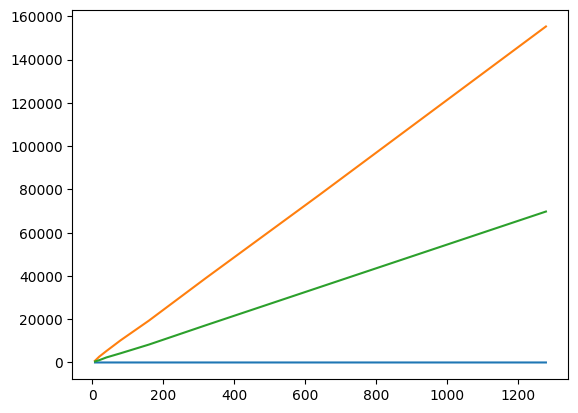

In [35]:
x = [8, 20, 40, 80, 160, 320, 640, 1280]
q = [0] * len(x)
la_cal = [0] * len(x)
lb_cal = [0] * len(x)
l = 0

for i in range(len(x)):
        print(x[i],i)
        taskset = get_taskset(6, int(x[i]),gen =True)
        total_count =0
        for j in range(len(taskset)):
            task = np.array(taskset[j])
            wcet = task[:, 0]
            deadlines = task[:, 1]
            periods = task[:, 2]
            
            utilizations = np.sum(wcet/np.minimum(periods, deadlines))
            if(utilizations<=1):
                ht_calculated = True
                total_count+=1
            else:
                #print("utilization is greater than 1")
                continue

            #print("utilization : " + str(utilizations))

            q[l] += qpa(task)
            la_cal[l] += La_boudcalculations(task)
            lb_cal[l] += Lb_boudcalculations(task)

        q[l]= q[l]/total_count
        la_cal[l] = la_cal[l]/total_count
        lb_cal[l] = lb_cal[l]/total_count
        print(total_count)
        l += 1

print(q)
plt.plot(x, q)
plt.plot(x, la_cal)
plt.plot(x, lb_cal)


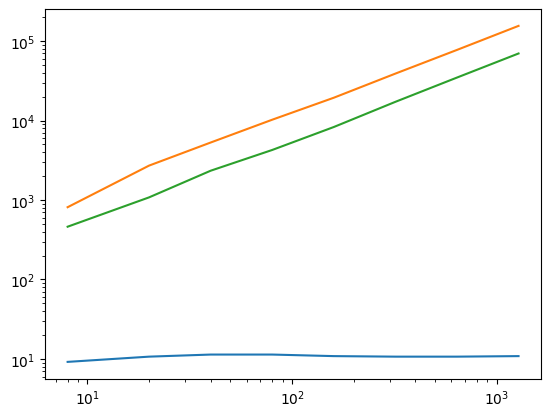

In [36]:
plt.yscale("log")
plt.xscale("log")

plt.plot(x, q)
plt.plot(x, la_cal)
plt.plot(x, lb_cal)


In [37]:
print(q)
print(la_cal)
print(lb_cal)

[9.166666666666666, 10.666666666666666, 11.333333333333334, 11.333333333333334, 10.833333333333334, 10.666666666666666, 10.666666666666666, 10.833333333333334]
[811.0, 2706.8333333333335, 5283.666666666667, 10235.666666666666, 19358.0, 38948.5, 77364.16666666667, 155331.83333333334]
[460.8333333333333, 1078.0, 2333.8333333333335, 4259.666666666667, 8284.166666666666, 17186.166666666668, 34722.833333333336, 69785.16666666667]


In [38]:
x = [1, 2, 3, 4, 5, 6]
q = [0] * len(x)
la_cal = [0] * len(x)
lb_cal = [0] * len(x)
l = 0

for i in range(len(x)):
        print(10**x[i],i)
        taskset = get_taskset(300, 30,t_max=10**x[i],gen = True)
        total_count =0
        for j in range(len(taskset)):
            task = np.array(taskset[j])
            wcet = task[:, 0]
            deadlines = task[:, 1]
            periods = task[:, 2]
            
            utilizations = np.sum(wcet/np.minimum(periods, deadlines))
            if(utilizations<=1):
                ht_calculated = True
                total_count+=1
            else:
                print("utilization is greater than 1")
                continue

            #print("utilization : " + str(utilizations))

            q[l] += qpa(task)
            #print(qpa(task))
            la_cal[l] += La_boudcalculations(task)
            lb_cal[l] += Lb_boudcalculations(task)

        q[l]= q[l]/total_count
        la_cal[l] = la_cal[l]/total_count
        lb_cal[l] = lb_cal[l]/total_count
        print(total_count,q[l])
        l += 1

print(q)
plt.yscale("log")
plt.plot(x, q)
plt.plot(x, la_cal)
plt.plot(x, lb_cal)


10 0
300 3.1433333333333335
100 1
300 6.486666666666666
1000 2
300 10.223333333333333
10000 3
300 12.706666666666667
100000 4


KeyboardInterrupt: 

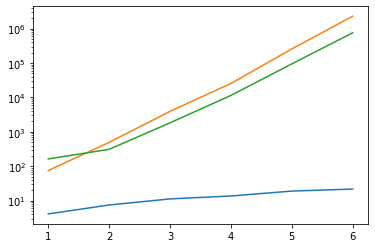

In [ ]:
plt.yscale("log")
plt.plot(x, q)
plt.plot(x, la_cal)
plt.plot(x, lb_cal)


0.66 0
60
0.69 1
60
0.72 2
60
0.75 3
60
0.78 4
60
0.81 5
60
0.84 6
60
0.87 7
60
0.9 8
60
0.93 9
60
0.96 10
60
0.99 11
53
[6.883333333333334, 7.3, 7.783333333333333, 7.866666666666666, 8.266666666666667, 8.616666666666667, 9.533333333333333, 9.933333333333334, 10.266666666666667, 11.216666666666667, 11.816666666666666, 12.622641509433961]


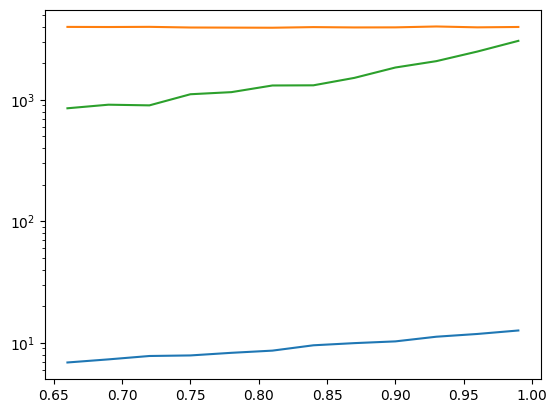

In [ ]:
x = [0.66,0.69,0.72,0.75,0.78,0.81,0.84,0.87,0.9,0.93,0.96,0.99]
q = [0] * len(x)
la_cal = [0] * len(x)
lb_cal = [0] * len(x)
l = 0

for i in range(len(x)):
        print(x[i],i)
        taskset = get_taskset(60, 30,util = x[i],gen = True)
        total_count =0
        for j in range(len(taskset)):
            task = np.array(taskset[j])
            wcet = task[:, 0]
            deadlines = task[:, 1]
            periods = task[:, 2]
            
            utilizations = np.sum(wcet/np.minimum(periods, deadlines))
            if(utilizations<=1):
                ht_calculated = True
                total_count+=1
            else:
                #print("utilization is greater than 1")
                continue

            #print("utilization : " + str(utilizations))

            q[l] += qpa(task)
            la_cal[l] += La_boudcalculations(task)
            lb_cal[l] += Lb_boudcalculations(task)

        q[l]= q[l]/total_count
        la_cal[l] = la_cal[l]/total_count
        lb_cal[l] = lb_cal[l]/total_count
        print(total_count)
        l += 1

print(q)
plt.yscale("log")
plt.plot(x, q)
plt.plot(x, la_cal)
plt.plot(x, lb_cal)

## Max of Di/Ti

In [54]:
def old_method(taskset):
    wcet = task[:, 0]
    deadlines = task[:, 1]
    periods = task[:, 2]

    La = La_bound(taskset)
    #print("La : " + str(La))
    #Lb = Lb_bound(taskset)
    #print("Lb : " + str(Lb))
    L = La#np.minimum(La, Lb)
    #print("L : " + str(L))

    t = get_max_abs_deadline(taskset, L)
    #print("t : " + str(t))
    h_t = procDemand_func(taskset, t)
    #print("h(t) : " + str(h_t))
    k=0
    deadline_n = k*periods + deadlines
    deadline_i = []
    total_cal = 0

    # while(np.min(deadline_n)<L):
    #     print(np.min(deadline_n),L,k)
    #     deadline_n = k*periods + deadlines
    #     k+=1
    #     for j in range(len(deadline_n)):
    #         if(deadline_n[j]<L and (deadline_n[j] not in deadline_i)):
    #             deadline_i.append(deadline_n[j])

    deadline_i = [0]
    for job in taskset:
        job_abs_deadline = 0
        if (job[1] <= job[2]):
            job_abs_deadline = np.floor((L)/job[2])
            if (job_abs_deadline*job[2]+job[1] <= L):
                job_abs_deadline = job_abs_deadline+1
        else:
            job_abs_deadline = np.floor((La)/job[1])

        dead_s = np.arange(1,job_abs_deadline+1)*job[2]+job[1]
        #print(dead_s)
        deadline_i = np.concatenate((dead_s,np.array(deadline_i)))

    deadline_i = np.unique(deadline_i)
    deadline_i = np.sort(deadline_i)
    #print(deadline_i)
    for j in range(len(deadline_i)):
        if(procDemand_func(taskset,deadline_i[j])>t):
            total_cal+=1
            break
        else:
            total_cal+=1
            continue

    
    return total_cal




0.66 0
60
0.69 1
60
0.72 2
60
0.75 3
60
0.78 4
60
0.81 5
60
0.84 6
60
0.87 7
60
0.9 8
60
0.93 9
60
0.96 10
60
0.99 11
60
[1.8333333333333333, 1.85, 1.2666666666666666, 1.0, 1.2333333333333334, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[3827.7, 3713.75, 3701.9, 3553.05, 3605.366666666667, 3620.233333333333, 3580.4666666666667, 3429.266666666667, 3327.4166666666665, 3389.266666666667, 3208.5833333333335, 3335.5]


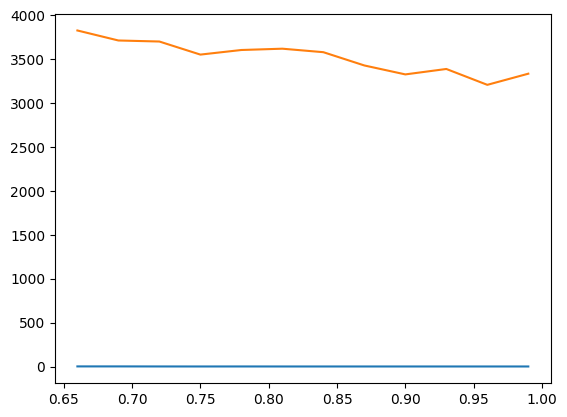

In [55]:
x = [0.66,0.69,0.72,0.75,0.78,0.81,0.84,0.87,0.9,0.93,0.96,0.99]
q = [0] * len(x)
la_cal = [0] * len(x)
lb_cal = [0] * len(x)
l = 0

for i in range(len(x)):
        print(x[i],i)
        taskset = get_taskset(60, 30,util = x[i])
        total_count =0
        for j in range(len(taskset)):
            task = np.array(taskset[j])
            wcet = task[:, 0]
            deadlines = task[:, 1]
            periods = task[:, 2]
            
            utilizations = np.sum(wcet/np.minimum(periods, deadlines))
            if(utilizations<=1):
                continue
            else:
                #print("utilization is greater than 1")
                ht_calculated = True
                total_count+=1
    

            #print("utilization : " + str(utilizations))

            q[l] += qpa(task)
            la_cal[l] += old_method(task)
            #lb_cal[l] += Lb_boudcalculations(task)

        q[l]= q[l]/total_count
        la_cal[l] = la_cal[l]/total_count
        #lb_cal[l] = lb_cal[l]/total_count
        print(total_count)
        l += 1

print(q)
#plt.yscale("log")
plt.plot(x, q)
print(la_cal)
plt.plot(x, la_cal)


500 0


C:\Users\Rohan\AppData\Local\Temp\ipykernel_11208\1387248568.py:8: RuntimeWarning: overflow encountered in double_scalars
  while a != b and (((a**2 - b**2) > 0.0000001 or (b**2 - a**2) > 0.0000001)):
C:\Users\Rohan\AppData\Local\Temp\ipykernel_11208\1387248568.py:8: RuntimeWarning: invalid value encountered in double_scalars
  while a != b and (((a**2 - b**2) > 0.0000001 or (b**2 - a**2) > 0.0000001)):


60 1.0
1000 1
60 1.0
1500 2
60 1.0
2000 3
60 1.0
2500 4
60 1.0
3000 5
60 1.0
3500 6
60 1.0
4000 7
60 1.0
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


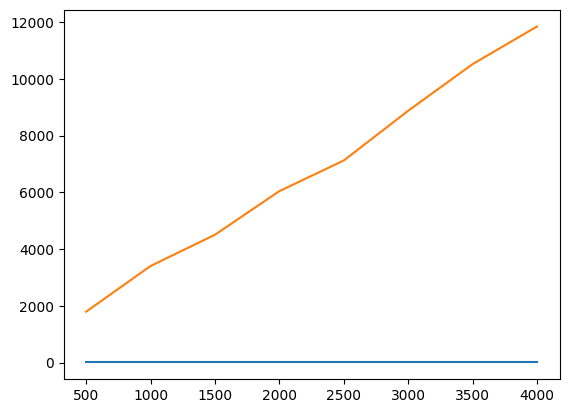

In [59]:
x = [500,1000,1500,2000,2500,3000,3500,4000]
q = [0] * len(x)
la_cal = [0] * len(x)
lb_cal = [0] * len(x)
l = 0

for i in range(len(x)):
        print(x[i],i)
        taskset = get_taskset(60, 30,t_max=x[i])
        total_count =0
        for j in range(len(taskset)):
            task = np.array(taskset[j])
            wcet = task[:, 0]
            deadlines = task[:, 1]
            periods = task[:, 2]
            
            utilizations = np.sum(wcet/np.minimum(periods, deadlines))
            if(utilizations<=1):
                
                continue

            else:
                ht_calculated = True
                total_count+=1

            #print("utilization : " + str(utilizations))

            q[l] += qpa(task)
            #print(qpa(task))
            la_cal[l] += old_method(task)
            lb_cal[l] += Lb_boudcalculations(task)

        q[l]= q[l]/total_count
        la_cal[l] = la_cal[l]/total_count
        print(total_count,q[l],la_cal[l])
        l += 1

print(q)
plt.plot(x, q)
plt.plot(x, la_cal)


8 0


C:\Users\Rohan\AppData\Local\Temp\ipykernel_11208\1387248568.py:8: RuntimeWarning: overflow encountered in double_scalars
  while a != b and (((a**2 - b**2) > 0.0000001 or (b**2 - a**2) > 0.0000001)):
C:\Users\Rohan\AppData\Local\Temp\ipykernel_11208\1387248568.py:8: RuntimeWarning: invalid value encountered in double_scalars
  while a != b and (((a**2 - b**2) > 0.0000001 or (b**2 - a**2) > 0.0000001)):


59 3.389830508474576 812.6779661016949
20 1
60 1.0 2323.65
30 2
60 1.0 3354.116666666667
40 3
60 1.0 4216.116666666667
50 4
60 1.0 4884.583333333333
60 5
60 1.0 6143.783333333334
70 6
60 1.0 6561.9
80 7
60 1.0 7607.466666666666
[3.389830508474576, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


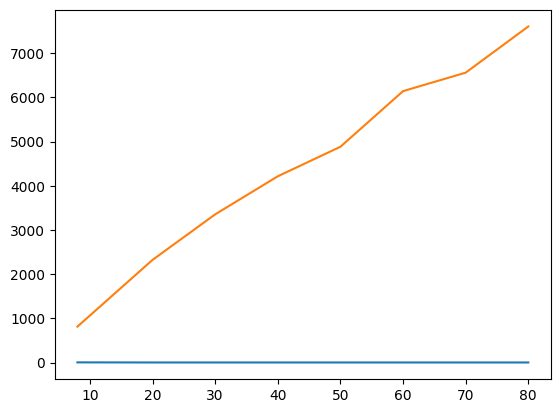

In [62]:
x = [8, 20, 30, 40, 50, 60, 70, 80]
q = [0] * len(x)
la_cal = [0] * len(x)
lb_cal = [0] * len(x)
l = 0

for i in range(len(x)):
        print(x[i],i)
        taskset = get_taskset(60, int(x[i]))
        total_count =0
        for j in range(len(taskset)):
            task = np.array(taskset[j])
            wcet = task[:, 0]
            deadlines = task[:, 1]
            periods = task[:, 2]
            
            utilizations = np.sum(wcet/np.minimum(periods, deadlines))
            if(utilizations<=1):
                
                continue

            else:
                ht_calculated = True
                total_count+=1

            #print("utilization : " + str(utilizations))

            q[l] += qpa(task)
            #print(qpa(task))
            la_cal[l] += old_method(task)
            lb_cal[l] += Lb_boudcalculations(task)

        q[l]= q[l]/total_count
        la_cal[l] = la_cal[l]/total_count
        print(total_count,q[l],la_cal[l])
        l += 1

print(q)
plt.plot(x, q)
plt.plot(x, la_cal)
